In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
df=pd.read_excel('DS1_C4_S5_Employee_Data_Practice.xlsx')
df.columns

Index(['Employee_Code ', 'Gender', 'Department', 'Annual Salary ($)', 'Age',
       'Work_Experience'],
      dtype='object')

Task 1 : How do various departments vary in how much they cost the company? Represent this visually
Hint:
1 Summarize the department-wise sum of annual salary
2 Use index & values properties of summarized data to plot bar graphs

In [42]:
a=df.groupby('Department')['Annual Salary ($)'].sum()

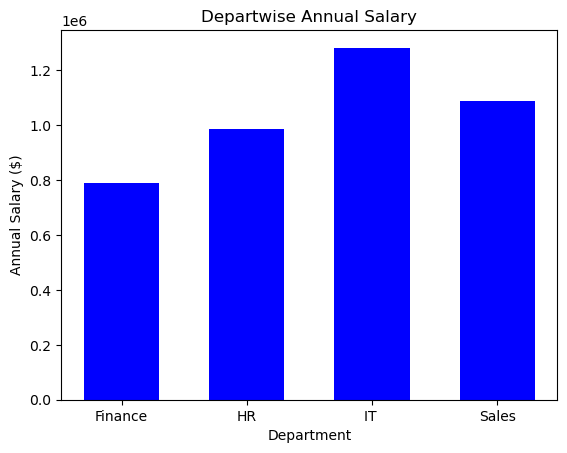

In [56]:
plt.bar(a.index,a.values,width=0.6,color='b');
plt.xlabel('Department');
plt.ylabel('Annual Salary ($)');
plt.title('Departwise Annual Salary');

Task 2 : Represent the department-wise total number of male & female employees

In [76]:
b=pd.crosstab(index=df['Department'],columns=df['Gender']).reset_index()
b

Gender,Department,Female,Male
0,Finance,2,11
1,HR,11,4
2,IT,10,12
3,Sales,4,16


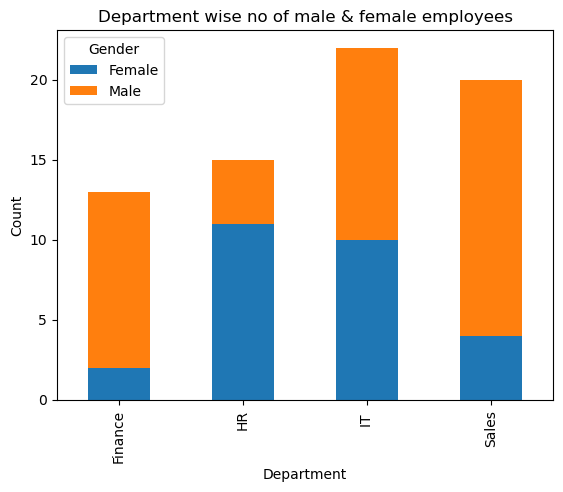

In [193]:
b.plot(x='Department',kind='bar', stacked=True,
        title='Department wise no of male & female employees',ylabel='Count');

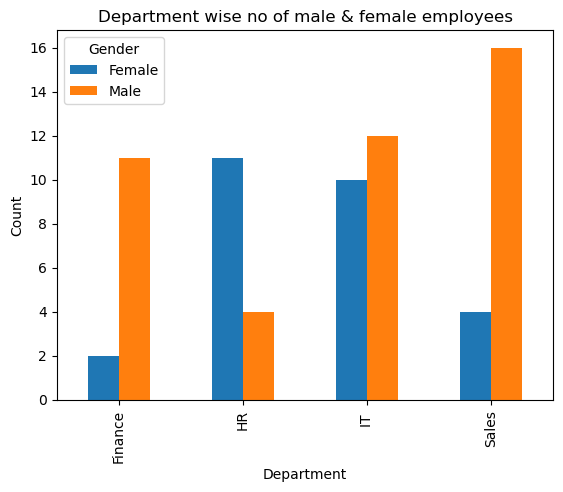

In [194]:
b.plot(x='Department',kind='bar', stacked=False,
        title='Department wise no of male & female employees',ylabel='Count');

Task 3 : How much salary the comapny might decide to offer a new member of IT department. Calculate average salary of filtered data

In [196]:
df[(df['Department']=='IT ')&(df['Work_Experience']==0)]['Annual Salary ($)'].mean()  #Avg Salary

28100.0

Task 4 : Department-wise ratio of cost to the company (Using Pie Chart)

In [149]:
a=df.groupby('Department')['Annual Salary ($)'].sum().reset_index()
a

,Department,Annual Salary ($)
0,Finance,790000
1,HR,987000
2,IT,1282900
3,Sales,1089000


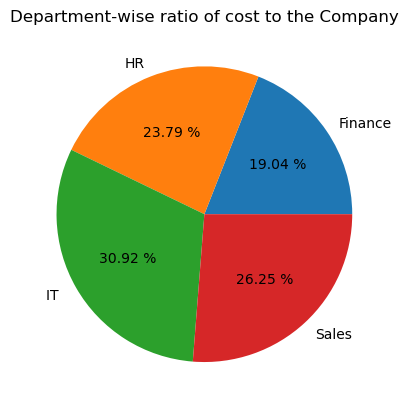

In [224]:
plt.pie(a['Annual Salary ($)'],labels=a['Department'],autopct='%.2f %%');
plt.title('Department-wise ratio of cost to the Company');
plt.show()                                     #IT department costs maximum to the company

Task 5 : Find age group which has greater number of employees. (Draw Histogram)

Index(['Employee_Code ', 'Gender', 'Department', 'Annual Salary ($)', 'Age',
       'Work_Experience'],
      dtype='object')

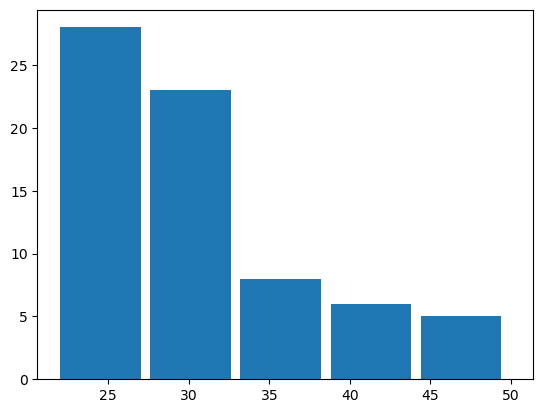

In [220]:
plt.hist(df['Age'],bins=5,width=5)
df.columns          #25-30 age group has greater number of employees

Task 6: Find trend in the salary based on employee experience

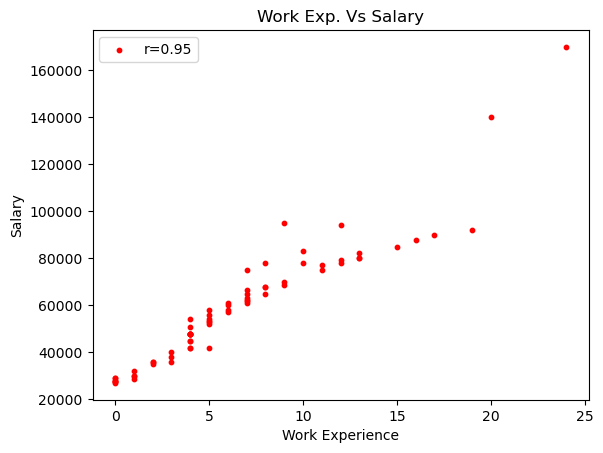

In [223]:
r=df['Work_Experience'].corr(df['Annual Salary ($)']).round(2)
plt.scatter(x=df['Work_Experience'],y=df['Annual Salary ($)'],c='r',s=10,label='r='+str(r))
plt.legend()
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Work Exp. Vs Salary')
plt.show()                                       #Strong positive correlation between Work Experience and Salary

Task 7 : Department-wise spread of all employees salaries

In [189]:
sal_sales=df[df['Department']=='Sales']['Annual Salary ($)']
sal_HR=df[df['Department']=='HR']['Annual Salary ($)']
sal_Finance=df[df['Department']=='Finance']['Annual Salary ($)']
sal_IT=df[df['Department']=='IT ']['Annual Salary ($)']

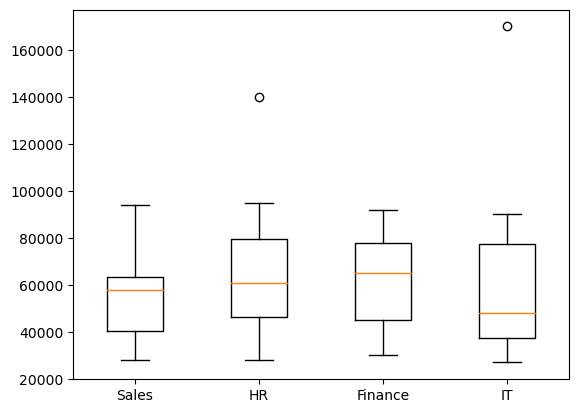

In [192]:
plt.boxplot([sal_sales,sal_HR,sal_Finance,sal_IT],labels=['Sales','HR','Finance','IT'])
plt.show()            #IT department has highest spread of salary